# Resolvendo EDO em Python
## 1. EDO de 1ª ordem
        

### 1.1Simples

Suponha que tenhamos uma EDO de 1ª ordem:

> $\frac{dx}{dt}= f(t,x) , x(0) = x_0$

Queremos implementar para resolver em Python. Primeiramente, a biblioteca SciPy tem funções para isso, a priori vamos ver oq a 
solve_ivp faz:

```python
    solve_ivp(f(t,x),t_span = (0,max(t)),y0=[x_0],t_eval = t)
```
onde:
- f(t,x) vai ser a função criada no programa que retorna a forma de f(t,x);
- t_span é o intervalo de tempo que estamos resolvendo a EDO;
- y0 é um array para os vários valores inciais $x_n(0)$;
- t_eval é o array com os valores da variável independente

A solve_ivp retorna uma matriz onde em cada linha são os valores das soluções $y_n$. 

**Exemplo**

Seja a EDO:

$\frac{dx}{dt} + \alpha x^2 + \beta = 0$

Devemos escrever na forma que mostramos no começo do texto e então implementar.O código a seguir é um exemplo de implementação:

Text(0, 0.5, 'velocidade (m/s)')

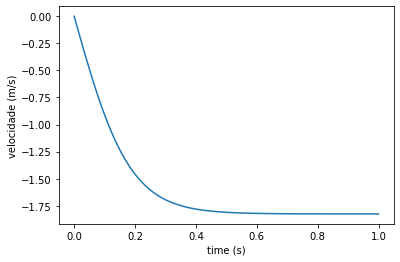

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#              EDOs de Primeira Ordem
# escrever na forma dx/dt = f(t,x) c/ uma x(0) = x_0

def dfdt (t,x):
    return (3*x**2 - 10)

x_0 = 0

t = np.linspace(0,1,100)

# solve_ivp(f(t,x),t_span = (0,max(t)),y0=[x_0],t_eval = t)
# t_span é o intervalo q estamos resolvendo, t_eval são os valores propriamente

solution = solve_ivp(dfdt,t_span = (0,max(t)),y0=[x_0],t_eval = t)

axe_y = solution.y [0]

plt.plot (t,axe_y)
plt.xlabel ('time (s)')
plt.ylabel ('velocidade (m/s)')


### 1.2 Acopladas
Agora imagine um par de EDOs acopladas:

> <center> $y'_1 - y_2 + 2 = 0; y_1(0) = 0$</center>

> <center> $y'_2 + y^2_1 = 0; y_2(0) = 0$</center>

Vamos adotar portanto a seguinte notação:

<center> $\vec{S} = \begin{bmatrix}
    y_1\\
    y_2
 \end{bmatrix}
 \rightarrow \frac{d\vec{S}}{dx} = \begin{bmatrix}
                                   \frac{dy_1}{dx}\\
                                   \frac{dy_2}{dx}
                                   \end{bmatrix} = \begin{bmatrix}
                                                       y'_1\\
                                                       y'_2
                                                    \end{bmatrix}
 $</center>
 
 Portanto, escrevendo na mesma ideia da EDO simples:
 
 $
 y'_n = f_n(x,y)
 $
 
 
 $
 \vec{S'} = \begin{bmatrix}
               y_2 - 2 \\
               -y^2_1
            \end{bmatrix}
 $
 
Agora onde antes era f(t,x):

```python 
    def dfdt (t,x):
        return (_f(t,x) escrita_)
```

Deve ser $y_n(x,S)$, no caso

```python
    def dSdx (x,S):
        y1,y2 = S
        return ([f_1(x,y),f_2(x,y)])
```

Vejamos o código:


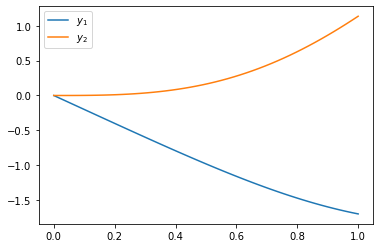

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def dSdx (x,S):
    y1,y2 = S
    return ([y2 - 2, y1**2])
y1_0 = 0
y2_0 = 0

S_0 = [y1_0,y2_0]

x = np.linspace(0,1)


solution = solve_ivp(dSdx,t_span = (0,max(x)),y0=S_0,t_eval = x)

py1 = solution.y[0]
py2 = solution.y[1]

plt.plot(x,py1,label='$y_1$')
plt.plot(x,py2,label='$y_2$')
plt.legend()
plt.show()




## 2. EDO de 2ª Ordem

Quando se trata de ordens superiores SciPy a priori não tem uma função específica, nos resta transformar uma EDO de 2ª Ordem em duas EDOs de 1ª. Tome por exemplo:

> <center> $(1) \ddot{x} - g sin(x) = 0$ </center>

Seja $\dot{x} = v$, entao
> <center> $(2)\dot{x} = v$ </center>

E a (1) fica:

> <center> $\dot{v} = g sin(x)$ </center>

Temos então o sistema de EDOs:

<center>$
\dot{x} = v\\
\dot{v} = g sin(x)
$</center>

Agora é só repetir o procedimento das EDOs de primeira ordem acopladas. Neste caso

<center>$
y'_1 = y_2\\
y'_2 = g sin(y_1)
$</center>


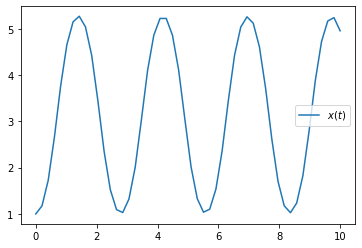

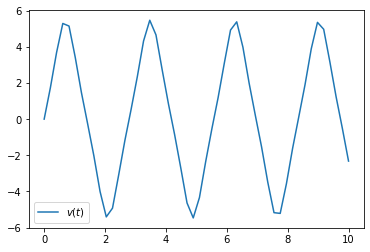

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def dSdx (x,S):
    y1,y2 = S
    return ([y2, 9.8*np.sin(y1)])
y1_0 = 1
y2_0 = 0

S_0 = [y1_0,y2_0]

x = np.linspace(0,10)


solution = solve_ivp(dSdx,t_span = (0,max(x)),y0=S_0,t_eval = x)

py1 = solution.y[0]
py2 = solution.y[1]

plt.plot(x,py1,label='$x(t)$')
plt.legend()
plt.show()
plt.plot(x,py2,label='$v(t)$')
plt.legend()
plt.show()


